### Create Libraries

In [2]:
# Data Processing
import pandas as pd
import numpy as np

# Modeling
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV

# Visualization
import matplotlib.pyplot as plt

### Load Data

In [3]:
training = 'archive/Uniqlo(FastRetailing) 2012-2016 Training - stocks2012-2016.csv'
test = 'archive/Uniqlo(FastRetailing) 2017 Test - stocks2017.csv'

df_train = pd.read_csv(training)
df_test = pd.read_csv(test)

df_train.head()

,Date,Open,High,Low,Close,Volume,Stock Trading
0,2016-12-30,42120,42330,41700,41830,610000,25628028000
1,2016-12-29,43000,43220,42540,42660,448400,19188227000
2,2016-12-28,43940,43970,43270,43270,339900,14780670000
3,2016-12-27,43140,43700,43140,43620,400100,17427993000
4,2016-12-26,43310,43660,43090,43340,358200,15547803000


### Process Data
- Reformat date (year-month-day) to separate Year Month Date columns

In [4]:
df_train['Date'] = pd.to_datetime(df_train['Date'])
#df_train = df_train.sort_values(by='Date')

df_train.insert(0, 'day', df_train['Date'].dt.day)
df_train.insert(0, 'month', df_train['Date'].dt.month)
df_train.insert(0, 'year', df_train['Date'].dt.year)

df_train = df_train.drop('Date', axis = 1)

df_test['Date'] = pd.to_datetime(df_test['Date'])
#df_test = df_test.sort_values(by='Date')

df_test.insert(0, 'day', df_test['Date'].dt.day)
df_test.insert(0, 'month', df_test['Date'].dt.month)
df_test.insert(0, 'year', df_test['Date'].dt.year)

df_test = df_test.drop('Date', axis = 1)


In [5]:
df_train.head()

,year,month,day,Open,High,Low,Close,Volume,Stock Trading
0,2016,12,30,42120,42330,41700,41830,610000,25628028000
1,2016,12,29,43000,43220,42540,42660,448400,19188227000
2,2016,12,28,43940,43970,43270,43270,339900,14780670000
3,2016,12,27,43140,43700,43140,43620,400100,17427993000
4,2016,12,26,43310,43660,43090,43340,358200,15547803000


In [6]:
df_test.head()

,year,month,day,Open,High,Low,Close,Volume,Stock Trading
0,2017,1,13,38900,39380,38240,38430,1321200,51197289000
1,2017,1,12,38300,38450,37930,38010,800900,30540359000
2,2017,1,11,38710,38880,38480,38560,545900,21089798000
3,2017,1,10,38620,38850,38150,38690,1196900,46107703000
4,2017,1,6,40500,41030,39720,39720,1435500,57708934000


### Splitting Data

In [7]:
X_train = df_train.drop(columns=["Close"])
y_train = df_train["Close"]
X_test = df_test.drop(columns=["Close"])
y_test = df_test["Close"]

In [8]:
print(X_train.shape)
X_train.head()

(1226, 8)


,year,month,day,Open,High,Low,Volume,Stock Trading
0,2016,12,30,42120,42330,41700,610000,25628028000
1,2016,12,29,43000,43220,42540,448400,19188227000
2,2016,12,28,43940,43970,43270,339900,14780670000
3,2016,12,27,43140,43700,43140,400100,17427993000
4,2016,12,26,43310,43660,43090,358200,15547803000


In [9]:
print(y_train.shape)
y_train.head()

(1226,)


0    41830
1    42660
2    43270
3    43620
4    43340
Name: Close, dtype: int64

In [10]:
print(X_test.shape)
X_test.head()

(7, 8)


,year,month,day,Open,High,Low,Volume,Stock Trading
0,2017,1,13,38900,39380,38240,1321200,51197289000
1,2017,1,12,38300,38450,37930,800900,30540359000
2,2017,1,11,38710,38880,38480,545900,21089798000
3,2017,1,10,38620,38850,38150,1196900,46107703000
4,2017,1,6,40500,41030,39720,1435500,57708934000


In [11]:
print(y_test.shape)
y_test.head()

(7,)


0    38430
1    38010
2    38560
3    38690
4    39720
Name: Close, dtype: int64

### Gradient Boosted

In [12]:
#initialize the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)

#fit the model on training data
gbr.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

#### Test Predictions

In [13]:
#make predictions on the test data
y_pred= gbr.predict(X_test)

In [14]:
print(y_pred)

[38861.41889286 38117.4535317  38520.58002344 38509.15078902
 39882.53518244 42977.08324561 43058.14732488]


In [15]:
print(y_test)

0    38430
1    38010
2    38560
3    38690
4    39720
5    42590
6    43290
Name: Close, dtype: int64


### Metrics

In [16]:
print("MSE : ", mean_squared_error(y_test, y_pred))

MSE :  65990.81168257732


In [17]:
#calculate regression metrics to compare with other models
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y_test - y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("R2 Score:", r2)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("Mean Absolute Percentage Error:", mape, "%")

R2 Score: 0.9833556398859014
Mean Squared Error: 65990.81168257732
Root Mean Squared Error: 256.88676821233383
Mean Absolute Error: 220.08753075292356
Mean Absolute Percentage Error: 0.5469444866006509 %


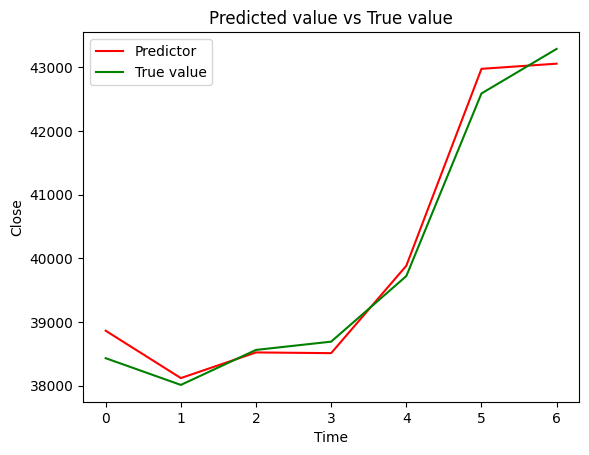

In [18]:
y = y_pred
z = y_test

plt.plot(y_pred, color='r', label='Predictor')
plt.plot(y_test, color='g', label='True value')

plt.xlabel("Time")
plt.ylabel("Close")
plt.title("Predicted value vs True value")

plt.legend()
plt.show()

### Hyperparameter Tuning of Gradient Boosted

In order to get the best model, hyperparameters can be used to tune the model best for the patterns in the data.

In [19]:
#hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300], #represents the number of iterations --> too many can lead to overfitting
    'learning_rate': [0.01, 0.1, 0.2], #how many trees
    'max_depth': [3, 5, 7], #depth of the decision tree
    'subsample': [0.8, 1.0], #randomness vs. whole sample
    'min_samples_split': [2, 5, 10], #min samples to split node
    'min_samples_leaf': [1, 2, 4], #min samples to be a leaf node
}

In [20]:
#use GridSearchCV to define the grid space and get best params
grid_search = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=3, #cross validation = 3
                           n_jobs=-1, #use all cores for speed
                           verbose=2,
                           scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score (Negative MSE):", -grid_search.best_score_)

Fitting 3 folds for each of 486 candidates, totalling 1458 fits


c:\Users\ashna\OneDrive - stevens.edu\AAI-595\aai595\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300, 'subsample': 1.0}
Best Score (Negative MSE): 17286124.265343584


In [21]:
#use the best model on the test set
best_gbr = grid_search.best_estimator_
best_y_pred= best_gbr.predict(X_test)

In [22]:
#evaluate the tuned model
mse_gbr= mean_squared_error(y_test, best_y_pred)
r2_gbr = r2_score(y_test, best_y_pred)
rmse_gbr = np.sqrt(mse_gbr)
mae_gbr = np.mean(np.abs(y_test - best_y_pred))
mape_gbr = np.mean(np.abs((y_test - best_y_pred) / y_test)) * 100


print(f"Mean Squared Error: {mse_gbr}")
print(f"R^2 Score: {r2_gbr}")
print(f"Root Mean Square: {rmse_gbr}")
print(f"Mean Absolute Error: {mae_gbr}")
print(f"Mean Absolute Percentage Error: {mape_gbr}")

Mean Squared Error: 77301.88450527049
R^2 Score: 0.9805027340867838
Root Mean Square: 278.0321645156734
Mean Absolute Error: 233.0666400349541
Mean Absolute Percentage Error: 0.5809045395755126


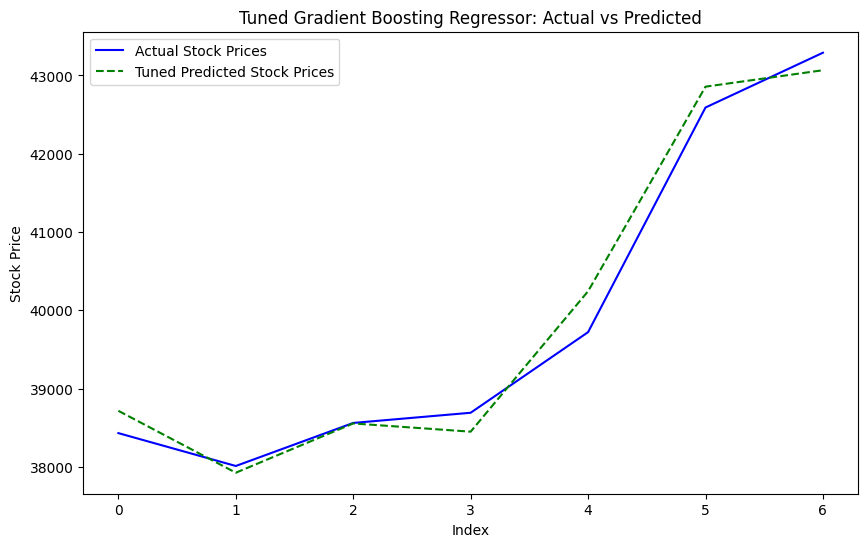

In [23]:
# plot actual vs tuned predicted
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label="Actual Stock Prices", color="blue")
plt.plot(best_y_pred, label="Tuned Predicted Stock Prices", color="green", linestyle="dashed")
plt.title("Tuned Gradient Boosting Regressor: Actual vs Predicted")
plt.xlabel("Index")
plt.ylabel("Stock Price")
plt.legend()
plt.show()